# Statistics Plotting Assignment
## Radiation Instrumentation and Measurement Laboratory
### Micheal Jones
#### Due: Sept. 24 2018


In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
% matplotlib inline

In [38]:
def gaussianFit(t, mean, scale):
    return scale*np.sqrt(1/(2*np.pi*mean))*np.exp(-((t-mean)**2)/(2*mean))

def poissonDist(x, rate):
     return np.exp(-rate)*rate**x/np.math.factorial(x)

def to_percent(y, position):
    s = str(y)
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

In [3]:
data1 = np.genfromtxt('statDataRawNoHead.txt')
data2 = np.genfromtxt('statDataRawNoHead2.txt')

In [12]:
mean1 = np.mean(data1)
mean2 = np.mean(data2)
sigma1 = np.std(data1)
sigma2 = np.std(data2)
x = np.arange(7500,8050,5)
width1 = 50/sigma1
width2 = 1/sigma2
print(mean1, sigma1, np.sqrt(mean1))
print(mean2, sigma2, np.sqrt(mean2))

7771.29 77.69842919905139 88.154920452576
3.45 1.7168284713389395 1.857417562100671


In [42]:
deviationData1 = np.zeros(len(data1))
deviationData2 = np.zeros(len(data2))
stdevData1 = np.zeros(len(data1))
stdevData2 = np.zeros(len(data2))
poisData = np.zeros(len(data2))
randXpts = np.arange(0,11,0.1)

i=0
for i in range(0,len(data1)):
    deviationData1[i] = abs(data1[i]-mean1)
    deviationData2[i] = abs(data2[i]-mean2)
    stdevData1[i] = (data1[i]-mean1)/sigma1
    stdevData2[i] = (data2[i]-mean2)/sigma2
    poisData[i] = poissonDist(i, mean2)
    

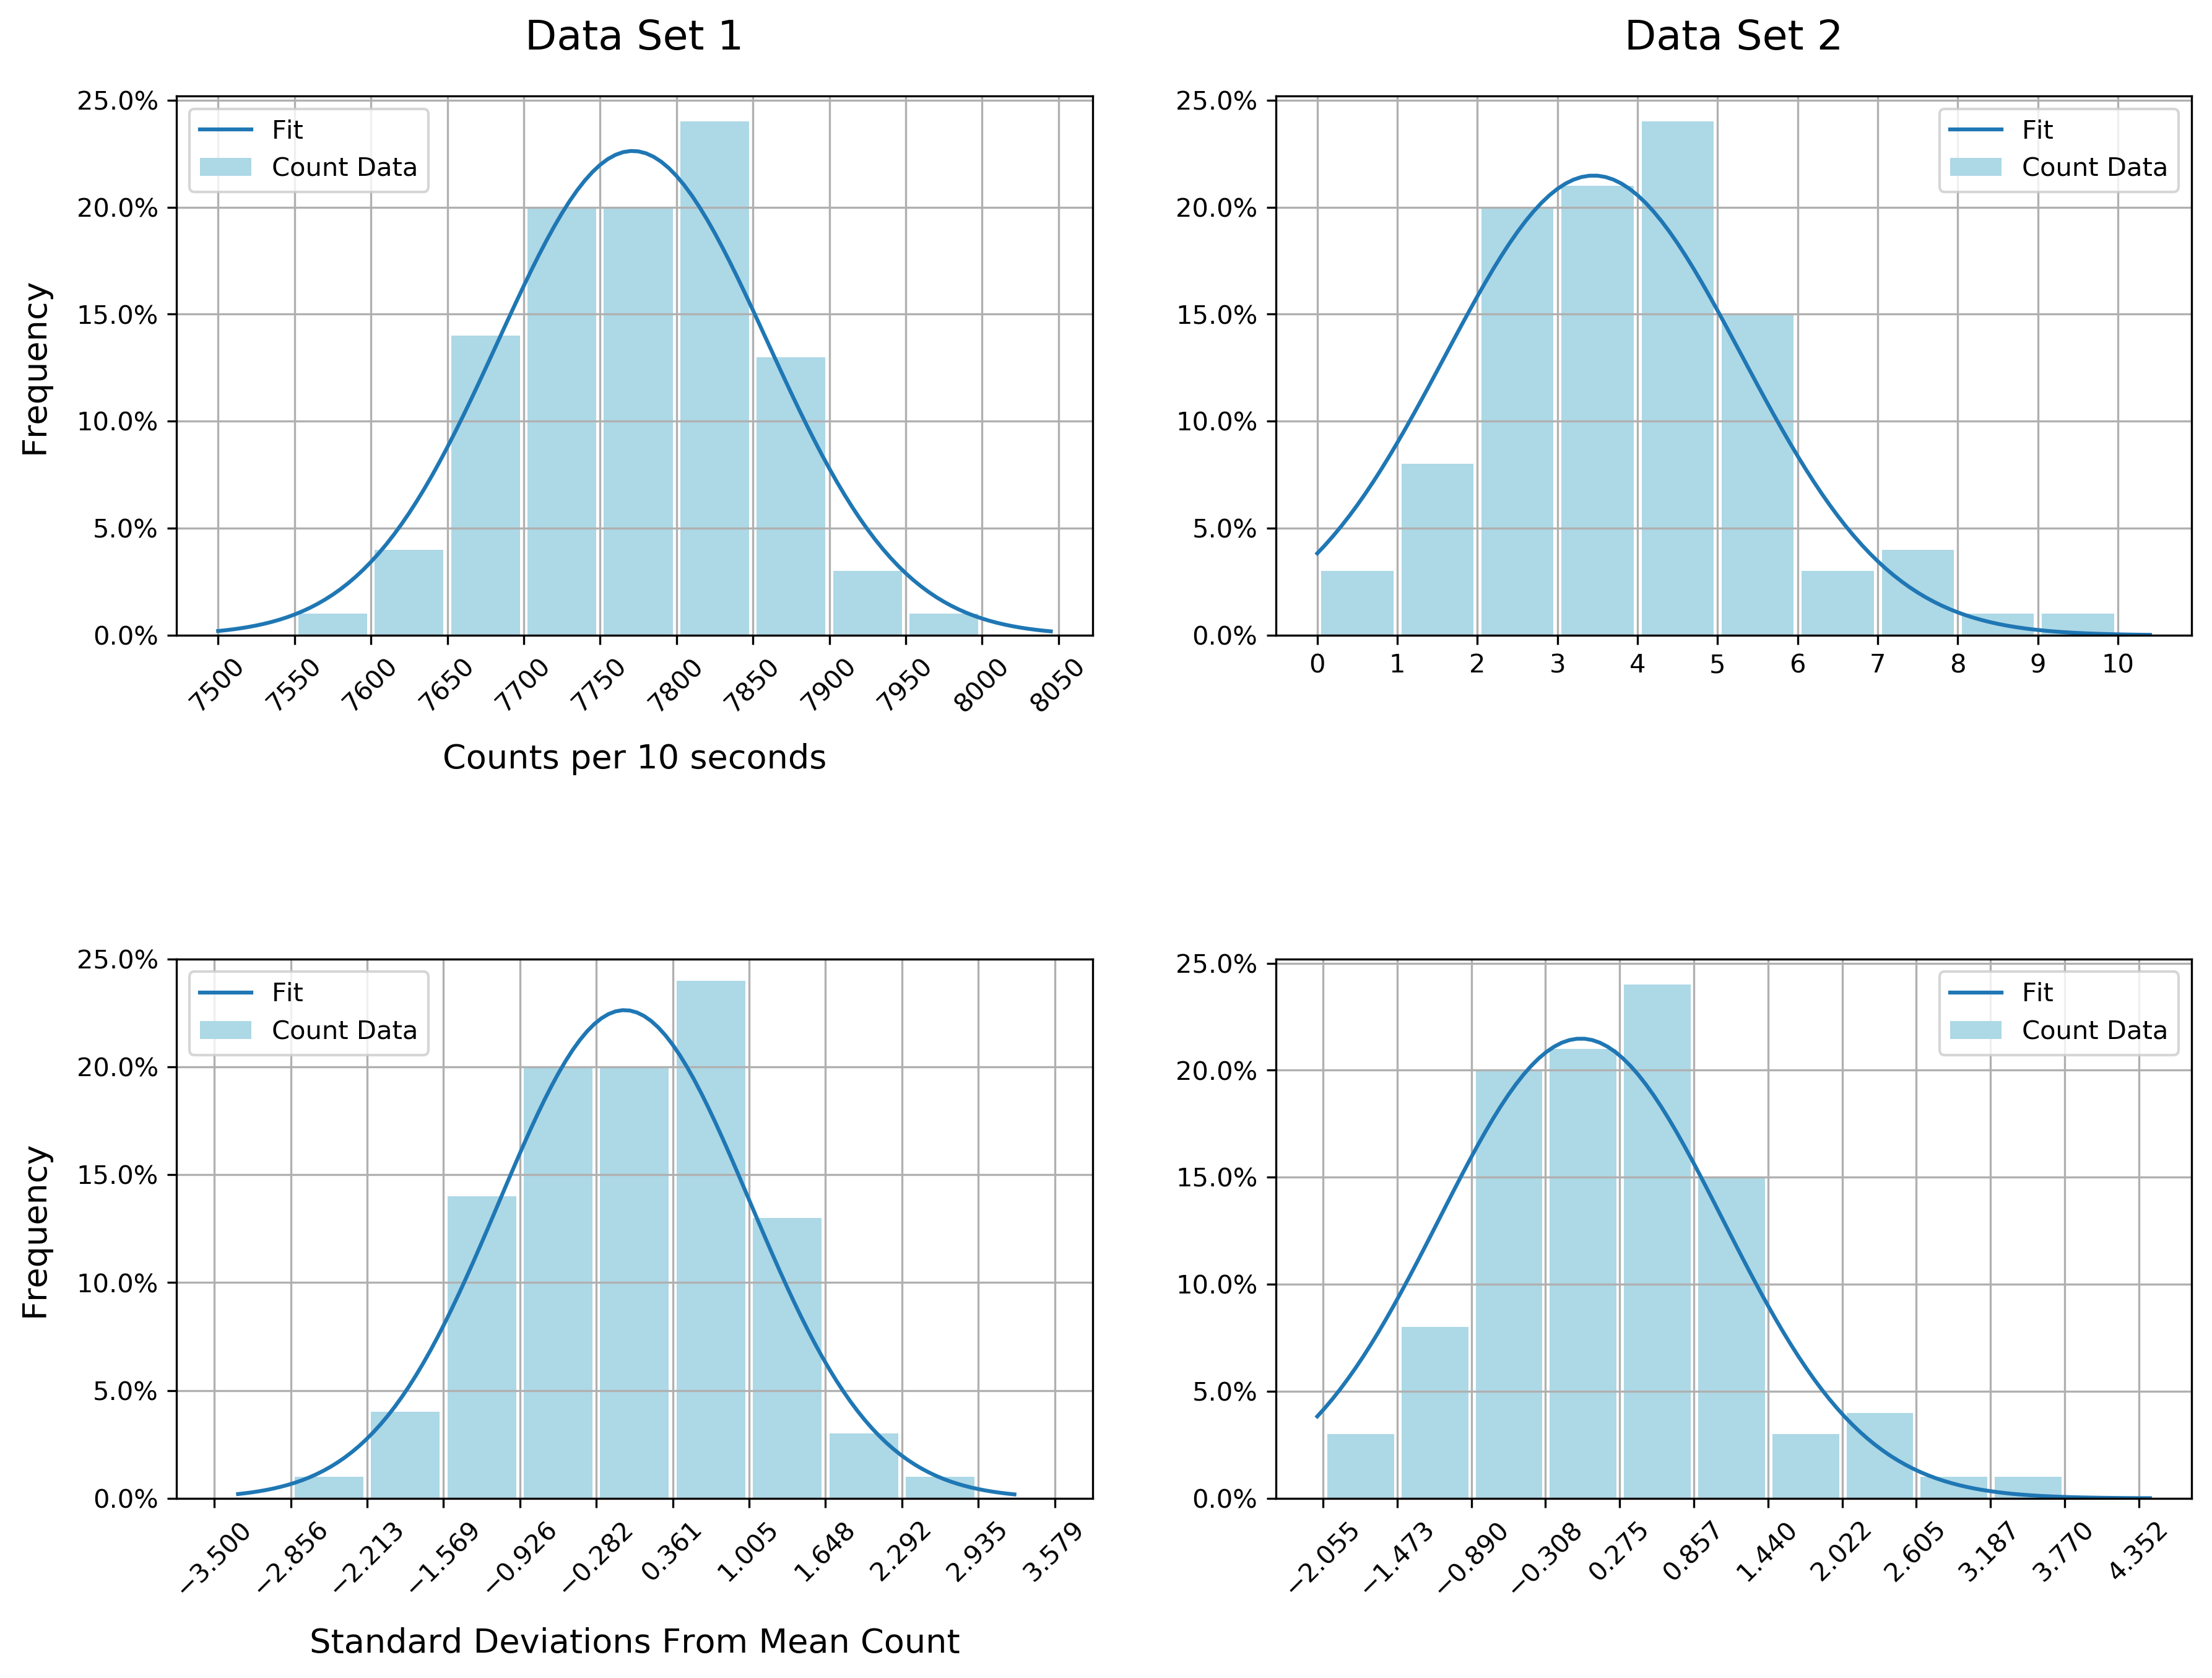

In [66]:
plt.figure(figsize=(14,10), dpi=300, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.6)

plt.subplot(221)
plt.hist(data1, range=(7500,8000), rwidth=0.9, color='lightblue')
plt.plot(x, gaussianFit(x,mean1,5000))
plt.title('Data Set 1', size='16', pad=18)
plt.xlabel('Counts per 10 seconds', size='13', labelpad=10)
plt.ylabel('Frequency', size='13', labelpad=10)
plt.tick_params(axis='x', labelrotation=45)
plt.xticks(np.arange(7500,8100,50))
plt.grid(True)
plt.legend(labels=('Fit','Count Data') , loc='upper left')
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.subplot(222)
plt.hist(data2, range=(0,10), rwidth=0.9, color='lightblue')
plt.plot(np.arange(0,10.5,0.1), gaussianFit(np.arange(0,10.5,0.1),mean2,100))
plt.title('Data Set 2', size='16', pad=18)
plt.xticks(np.arange(0,11,1))
plt.grid(True)
plt.legend(labels=('Fit','Count Data') , loc='upper right')
plt.gca().yaxis.set_major_formatter(formatter)

plt.subplot(223)
plt.hist(stdevData1, range=(-3.5,3.5), bins= np.arange(-3.5,4,width1), rwidth=0.9, color='lightblue')
plt.plot(np.arange(-3.3,3.3,0.06), gaussianFit(x,mean1,5000))
#plt.title('Data Set 1', size='16', pad=18)
plt.xlabel('Standard Deviations From Mean Count', size='13', labelpad=10)
plt.ylabel('Frequency', size='13', labelpad=10)
plt.ylim(0,25)
plt.tick_params(axis='x', labelrotation=45)
plt.xticks(np.arange(-3.5,4,width1))
plt.grid(True)
plt.legend(labels=('Fit','Count Data') , loc='upper left')
plt.gca().yaxis.set_major_formatter(formatter)

plt.subplot(224)
plt.hist(stdevData2, range=(-2.05,3.5), bins= np.arange(-2.05,4.3,width2), rwidth=0.9, color='lightblue')
plt.plot(np.arange(-2.1,4.5,0.06), gaussianFit(np.arange(0,11,0.1),mean2,100))
#plt.title('Data Set 2', size='16', pad=18)
#plt.plot(np.arange(-2.0,3.0,0.05), 100*poisData)
plt.xticks(np.arange(-2.055,4.4,width2))
plt.grid(True)
plt.legend(labels=('Fit','Count Data') , loc='upper right')
plt.tick_params(axis='x', labelrotation=45)
plt.gca().yaxis.set_major_formatter(formatter)


plt.savefig('statsLabData.png', figsize=(16,8))
plt.show()

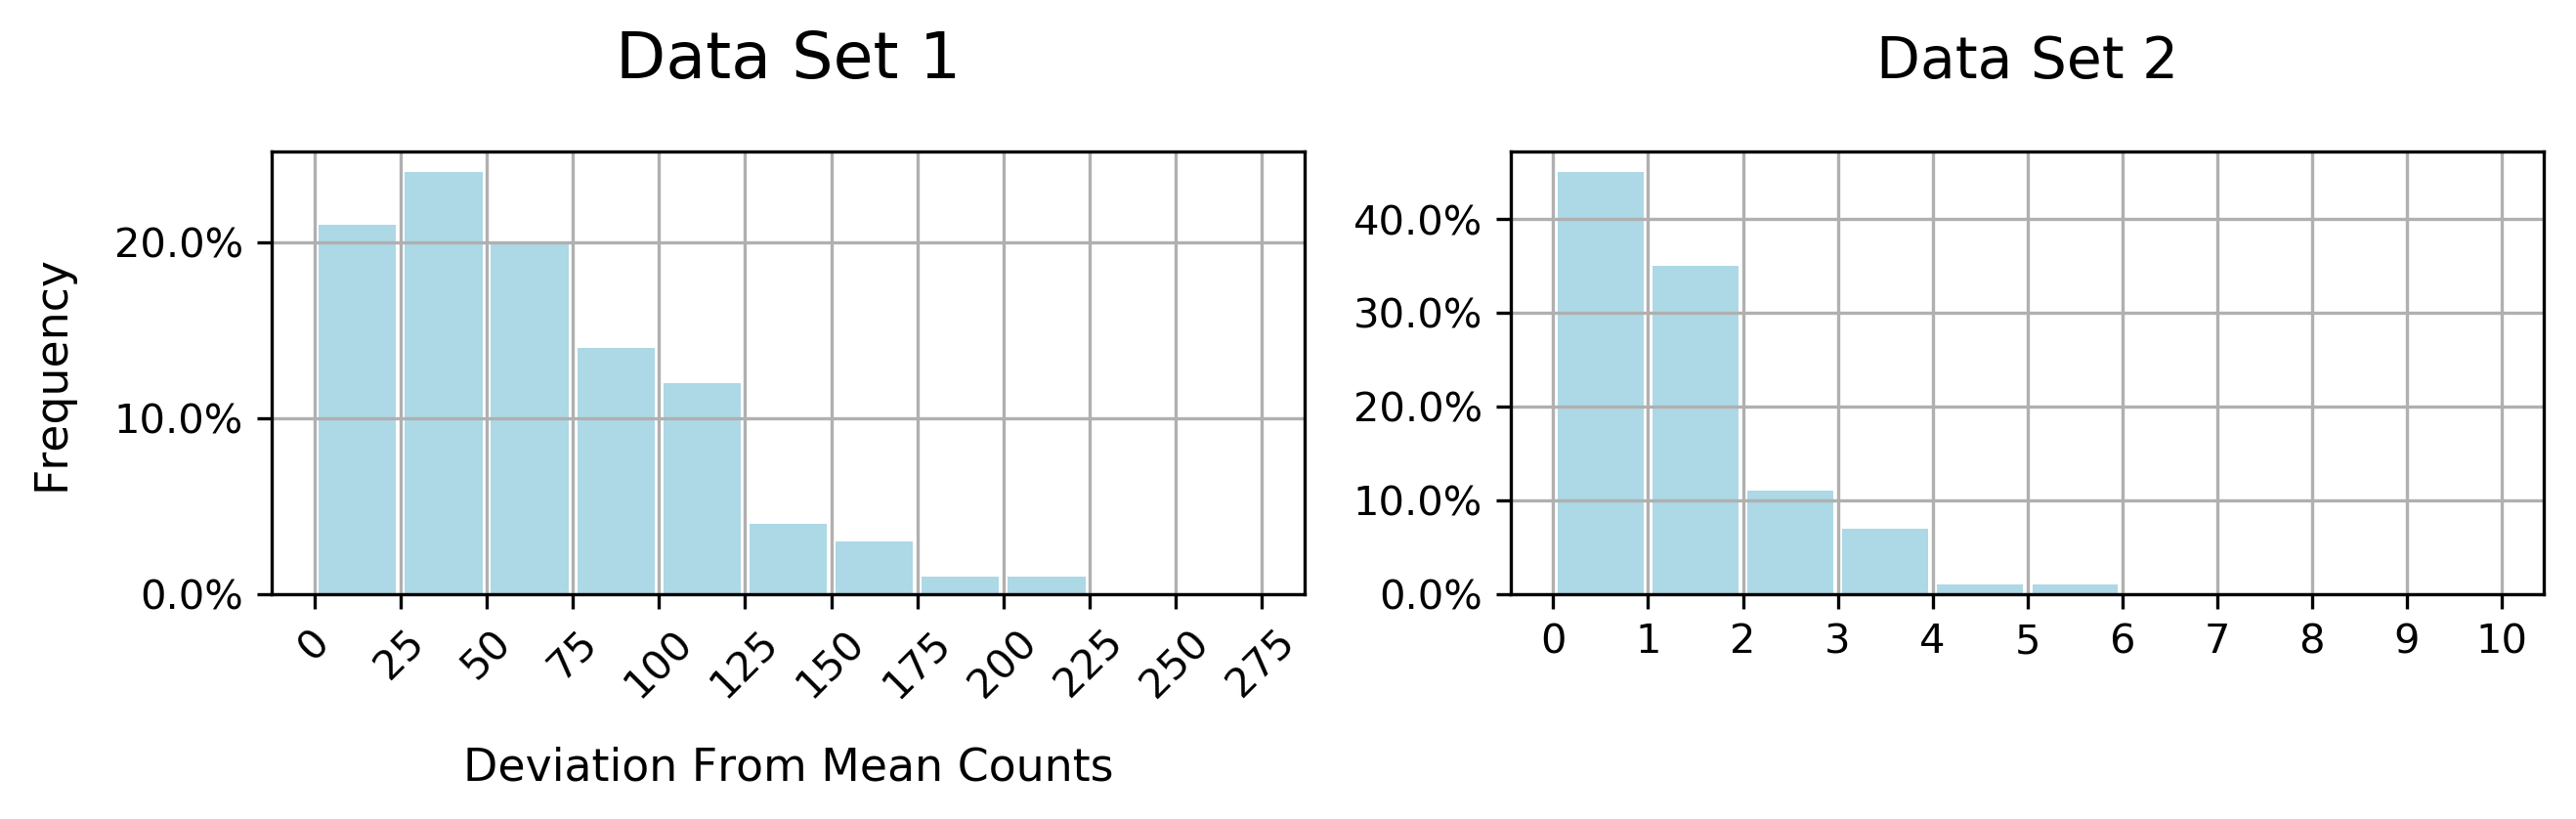

In [37]:
plt.figure(figsize=(10,2), dpi=300, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.6)

plt.subplot(121)
plt.hist(deviationData1, range=(0,300), bins= np.arange(0,300,25), rwidth=0.9, color='lightblue')
#plt.plot(x, gaussianFit(x,mean1,5000))
plt.title('Data Set 1', size='16', pad=18)
plt.xlabel('Deviation From Mean Counts', size='11', labelpad=10)
plt.ylabel('Frequency', size='11', labelpad=10)
plt.tick_params(axis='x', labelrotation=45)
plt.xticks(np.arange(0,300,25))
plt.grid(True)
#plt.legend(labels=('Gaussian Fit','Count Data') , loc='upper right')
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.subplot(122)
plt.hist(deviationData2, range=(0,10), rwidth=0.9, color='lightblue')
#plt.plot(np.arange(0,10.5,0.1), gaussianFit(np.arange(0,10.5,0.1),mean2,100))
plt.title('Data Set 2', size='14', pad=18)
plt.xticks(np.arange(0,11,1))
plt.grid(True)
#plt.legend(labels=('Gaussian Fit','Count Data') , loc='upper right')
plt.gca().yaxis.set_major_formatter(formatter)

